In [1]:
import pints
import pandas as pd
import numpy as np
import epipi
import pints.plot
import matplotlib.pyplot as plt

In [8]:
theta = pd.read_csv('../EpiOS/y_interpolated.csv')['y_interpolated'].values
omega = pd.read_csv('../EpiOS/omega.csv')['omega'].values
log_prior_list = [pints.UniformLogPrior(0, 2000) for _ in range(len(theta))]
log_prior_list.append(pints.TruncatedGaussianLogPrior(0, 1, 0.1, np.inf))
log_prior = pints.ComposedLogPrior(*log_prior_list)
log_posterior = pints.LogPosterior(epipi.PredictIncidenceLogPDF(theta, omega), log_prior)
y_inter_init = np.array(list(np.random.randint(100, 2000, size=len(theta))) + [10])
y_true_copy1 = pd.read_csv('../EpiOS/incidences.csv')['mean'].values
y_true_copy2 = pd.read_csv('../EpiOS/incidences.csv')['mean'].values
init = [y_inter_init, y_true_copy1, y_true_copy2]
mcmc = pints.MCMCController(
    log_posterior, 3, init, method=pints.NoUTurnMCMC)
mcmc.set_max_iterations(500)
chains = mcmc.run()

/var/folders/5q/gy5_gx0s17j9qlczj9knlfwm0000gn/T/ipykernel_31733/117459395.py:3: DeprecationWarning: `product` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `prod` instead.
  log_prior_list = [pints.UniformLogPrior(0, 2000) for _ in range(len(theta))]


Using Hamiltonian Monte Carlo
Generating 3 chains.
Running in sequential mode.
Iter. Eval. Accept.   Accept.   Accept.   Time m:s
0     3      0         0         0          0:00.0
1     63     0         0         0          0:00.1
2     123    0         0         0          0:00.2
3     183    0         0         0          0:00.3
20    1203   0         0         0          0:01.6
40    2403   0         0         0          0:03.2
60    3603   0         0         0          0:04.8
80    4803   0         0         0          0:06.4
100   6003   0         0         0          0:08.0
120   7203   0         0         0          0:09.6
140   8403   0         0         0          0:11.1
160   9603   0         0         0          0:12.9
180   10803  0         0         0          0:14.5
200   12003  0         0         0          0:16.1
220   13203  0         0         0          0:17.7
240   14403  0         0         0          0:19.3
260   15603  0         0         0          0:20.9
280

In [5]:
pints.rhat(chains[2])

1.431167019879645

In [ ]:
pints.plot.trace(chains)
plt.show()

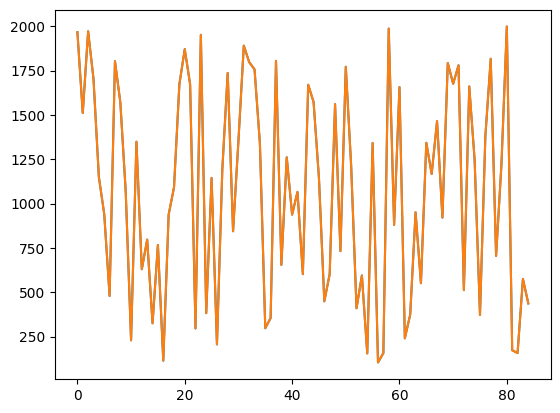

In [9]:
chain0 = chains[0]
# chain = chain[6000:]
chain0_mean = np.mean(chain0, axis=0)
plt.plot(chain0_mean[:-1])
plt.plot(y_inter_init[:-1])
plt.show()

[ 7.67386155e-13 -4.61852778e-14  2.34479103e-13 -7.10542736e-14
 -1.13686838e-12  6.53699317e-13  1.15107923e-12 -5.96855898e-13
 -2.35900188e-12  5.11590770e-13  1.81898940e-12 -2.16004992e-12
 -1.87583282e-12 -1.36424205e-12 -4.09272616e-12 -3.41060513e-13
 -5.79802872e-12 -1.25055521e-12 -5.11590770e-12 -1.06865627e-11
  3.41060513e-12 -4.77484718e-12 -8.86757334e-12 -4.77484718e-12
  2.27373675e-13 -5.22959454e-12  9.09494702e-13 -2.27373675e-13
 -3.86535248e-12  1.13686838e-12  1.20508048e-11  1.13686838e-12
 -7.73070497e-12  1.50066626e-11 -5.68434189e-12  8.98126018e-12
  1.13686838e-11  2.95585778e-12 -8.41282599e-12  3.41060513e-13
 -2.95585778e-12  5.11590770e-12 -7.04858394e-12  1.70530257e-12
 -6.36646291e-12 -2.78532752e-12  2.50111043e-12 -2.72848411e-12
  3.97903932e-12 -1.05160325e-12 -1.53477231e-12 -9.94759830e-14
  1.42108547e-12  1.13686838e-12  7.38964445e-13  2.98427949e-13
  9.09494702e-13 -3.55271368e-13  1.52766688e-13 -1.56319402e-13
 -2.70006240e-13 -3.33955

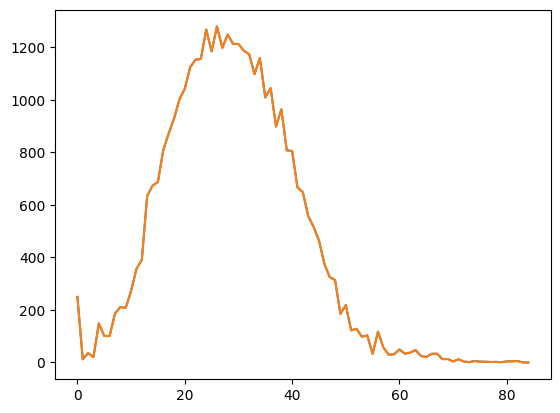

In [10]:
chain1 = chains[1]
# chain = chain[6000:]
chain1_mean = np.mean(chain1, axis=0)
plt.plot(chain1_mean[:-1])
plt.plot(y_true_copy1[:-1])
print(chain1_mean - y_true_copy1)
plt.show()

[ 7.67386155e-13 -4.61852778e-14  2.34479103e-13 -7.10542736e-14
 -1.13686838e-12  6.53699317e-13  1.15107923e-12 -5.96855898e-13
 -2.35900188e-12  5.11590770e-13  1.81898940e-12 -2.16004992e-12
 -1.87583282e-12 -1.36424205e-12 -4.09272616e-12 -3.41060513e-13
 -5.79802872e-12 -1.25055521e-12 -5.11590770e-12 -1.06865627e-11
  3.41060513e-12 -4.77484718e-12 -8.86757334e-12 -4.77484718e-12
  2.27373675e-13 -5.22959454e-12  9.09494702e-13 -2.27373675e-13
 -3.86535248e-12  1.13686838e-12  1.20508048e-11  1.13686838e-12
 -7.73070497e-12  1.50066626e-11 -5.68434189e-12  8.98126018e-12
  1.13686838e-11  2.95585778e-12 -8.41282599e-12  3.41060513e-13
 -2.95585778e-12  5.11590770e-12 -7.04858394e-12  1.70530257e-12
 -6.36646291e-12 -2.78532752e-12  2.50111043e-12 -2.72848411e-12
  3.97903932e-12 -1.05160325e-12 -1.53477231e-12 -9.94759830e-14
  1.42108547e-12  1.13686838e-12  7.38964445e-13  2.98427949e-13
  9.09494702e-13 -3.55271368e-13  1.52766688e-13 -1.56319402e-13
 -2.70006240e-13 -3.33955

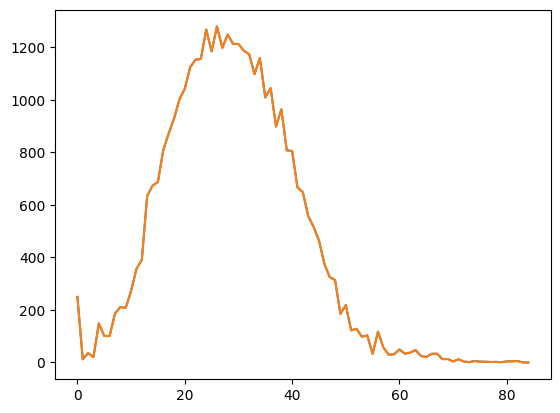

In [11]:
chain2 = chains[2]
# chain = chain[6000:]
chain2_mean = np.mean(chain2, axis=0)
plt.plot(chain2_mean[:-1])
plt.plot(y_true_copy2[:-1])
print(chain2_mean - y_true_copy2)
print(chain2_mean[-1])
plt.show()

In [ ]:
lower = [0] * (len(theta) + 1)
upper = [10000] * len(theta) + [100]
boundaries = pints.RectangularBoundaries(lower, upper)
x0 = np.array([100] * len(theta) + [1])
log_prior_list = [pints.UniformLogPrior(0, 10000) for _ in range(len(theta))]
log_prior_list.append(pints.GaussianLogPrior(0, 1))
log_prior = pints.ComposedLogPrior(*log_prior_list)
log_posterior = pints.LogPosterior(epipi.PredictIncidenceLogPDF(theta, omega), log_prior)
found_parameters, found_value = pints.optimise(
    # epipi.PredictIncidenceLogPDF(theta, omega),
    log_posterior,
    x0,
    boundaries=boundaries,
    method=pints.NelderMead,
    )

Maximising LogPDF
Using Nelder-Mead
Running in sequential mode.
Iter. Eval. Best      Current   Time m:s
0     87    -6.68e+08 -6.68e+08   0:00.1
1     88    -6.37e+08 -6.37e+08   0:00.1
2     89    -6.37e+08 -6.37e+08   0:00.1
3     90    -6.37e+08 -6.37e+08   0:00.1
20    107   -6.37e+08 -6.37e+08   0:00.1
40    127   -6.37e+08 -6.37e+08   0:00.1
60    147   -6.37e+08 -6.37e+08   0:00.1
80    167   -6.37e+08 -6.37e+08   0:00.1
100   187   -6.37e+08 -6.37e+08   0:00.1
120   207   -6.37e+08 -6.37e+08   0:00.1
140   227   -6.37e+08 -6.37e+08   0:00.1
160   247   -6.37e+08 -6.37e+08   0:00.1
180   267   -6.37e+08 -6.37e+08   0:00.1
200   287   -6.37e+08 -6.37e+08   0:00.1
202   288   -6.37e+08 -6.37e+08   0:00.1
Halting: No significant change for 200 iterations.


/var/folders/5q/gy5_gx0s17j9qlczj9knlfwm0000gn/T/ipykernel_70277/2918568405.py:5: DeprecationWarning: `product` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `prod` instead.
  log_prior_list = [pints.UniformLogPrior(0, 10000) for _ in range(len(theta))]
/Users/yunliqi/mambaforge/envs/limited-resources/lib/python3.11/site-packages/pints/_optimisers/_nelder_mead.py:135: UserWarning: Nelder-Mead optimisation does not support boundaries.
  warnings.warn(
